In [12]:
import gym

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [13]:
env_name = "CarRacing-v0"
env = gym.make(env_name)

C:\Users\antol\anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [60]:
print('Observation Space:', env.observation_space)
print('Action Space:', env.action_space)

Observation Space: Box(0, 255, (96, 96, 3), uint8)
Action Space: Box(-1.0, 1.0, (3,), float32)


In [67]:
# arg 0 : i don't know
# arg 1 : speed
# arg 2 : faaaast -1
def naive_policy(i):
    action = env.action_space.sample()
    if i > 200 :
        action[0] = 0
        action[1] = 1
        action[2] = 0.8
    return action

Track generation: 1190..1492 -> 302-tiles track
1000
Sum of rewards: -26.9102990033223


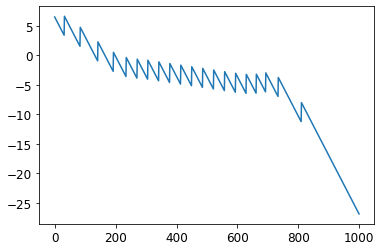

In [69]:
def play_episode(policy):
    observation = env.reset()
    i=0
    sum_rewards=[]

    while True:
        env.render()
        action = policy(i)
        observation, reward, done, info = env.step(action)  
        i+=1
        sum_rewards.append(reward)
        if done: 
            break;

    print(i)
    print('Sum of rewards:', np.sum(sum_rewards))
    plt.plot(np.cumsum(sum_rewards))
    env.close()

play_episode(policy = naive_policy)

In [32]:
env.close()

## We chose to discretize the action space

In [ ]:
action_space = [[-1,0,0],[0,0,0],[1,0,0],[0,1,0],[0,0,1]]
n_actions = len(action_space)